In [21]:
# ================== CS Students Track Recommendation System ==================
# Graduation Project - Track Recommendation Model
# This model suggests suitable career tracks for CS students based on their skills and interests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [22]:
# ================== 1. Load and Explore Data ==================
print("=" * 60)
print("LOADING DATA")
print("=" * 60)

df = pd.read_csv("cs_students1.csv")
print(f"\nDataset Shape: {df.shape[0]} students, {df.shape[1]} features")
print(f"\nFirst few records:")
print(df.head())

print(f"\n\nData Types:")
print(df.dtypes)

print(f"\n\nMissing Values:")
print(df.isnull().sum())

print(f"\n\nDuplicate Records: {df.duplicated().sum()}")


LOADING DATA

Dataset Shape: 180 students, 11 features

First few records:
   Student ID  Gender  Age  GPA             Major        Interested Domain  \
0           1    Male   21  3.5  Computer Science  Artificial Intelligence   
1           2  Female   20  3.2  Computer Science             Data Science   
2           3    Male   22  3.8  Computer Science     Software Development   
3           4  Female   21  3.7  Computer Science          Web Development   
4           5    Male   23  3.4  Computer Science            Cybersecurity   

              Projects                         Track   Python     SQL     Java  
0  Chatbot Development   Machine Learning Researcher   Strong  Strong     Weak  
1       Data Analytics                Data Scientist  Average  Strong     Weak  
2   E-commerce Website             Software Engineer   Strong  Strong  Average  
3   Full-Stack Web App                 Web Developer     Weak  Strong   Strong  
4     Network Security  Information Security Analys

In [23]:
# ================== 2. Data Cleaning ==================
print("\n" + "=" * 60)
print("DATA CLEANING")
print("=" * 60)

# Remove Student ID (not needed for prediction)
df.drop(columns=["Student ID"], axis=1, inplace=True)
print("\nRemoved Student ID column")



DATA CLEANING

Removed Student ID column


In [24]:
# ================== 3. Exploratory Data Analysis ==================
print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Track distribution
print("\n\nTrack Distribution:")
print(df["Track"].value_counts())

# Gender distribution
print("\n\nGender Distribution:")
print(df["Gender"].value_counts())


EXPLORATORY DATA ANALYSIS


Track Distribution:
Track
Web Developer                   19
Mobile App Developer            17
Information Security Analyst    17
Cloud Solutions Architect       16
Database Administrator          16
Software Engineer               14
Machine Learning Engineer       13
NLP Research Scientist          11
Graphics Programmer              9
Data Scientist                   8
Data Analyst                     6
AI Researcher                    6
Game Developer                   4
UX Designer                      2
Quantum Computing Researcher     2
Bioinformatician                 2
Healthcare IT Specialist         2
Machine Learning Researcher      1
Robotics Engineer                1
Embedded Software Engineer       1
Security Analyst                 1
Ethical Hacker                   1
IoT Developer                    1
Computer Vision Engineer         1
DevOps Engineer                  1
NLP Engineer                     1
VR Developer                     1



GENERATING VISUALIZATIONS

Number of unique tracks: 33

✓ Visualizations saved to 'data_visualization.png'


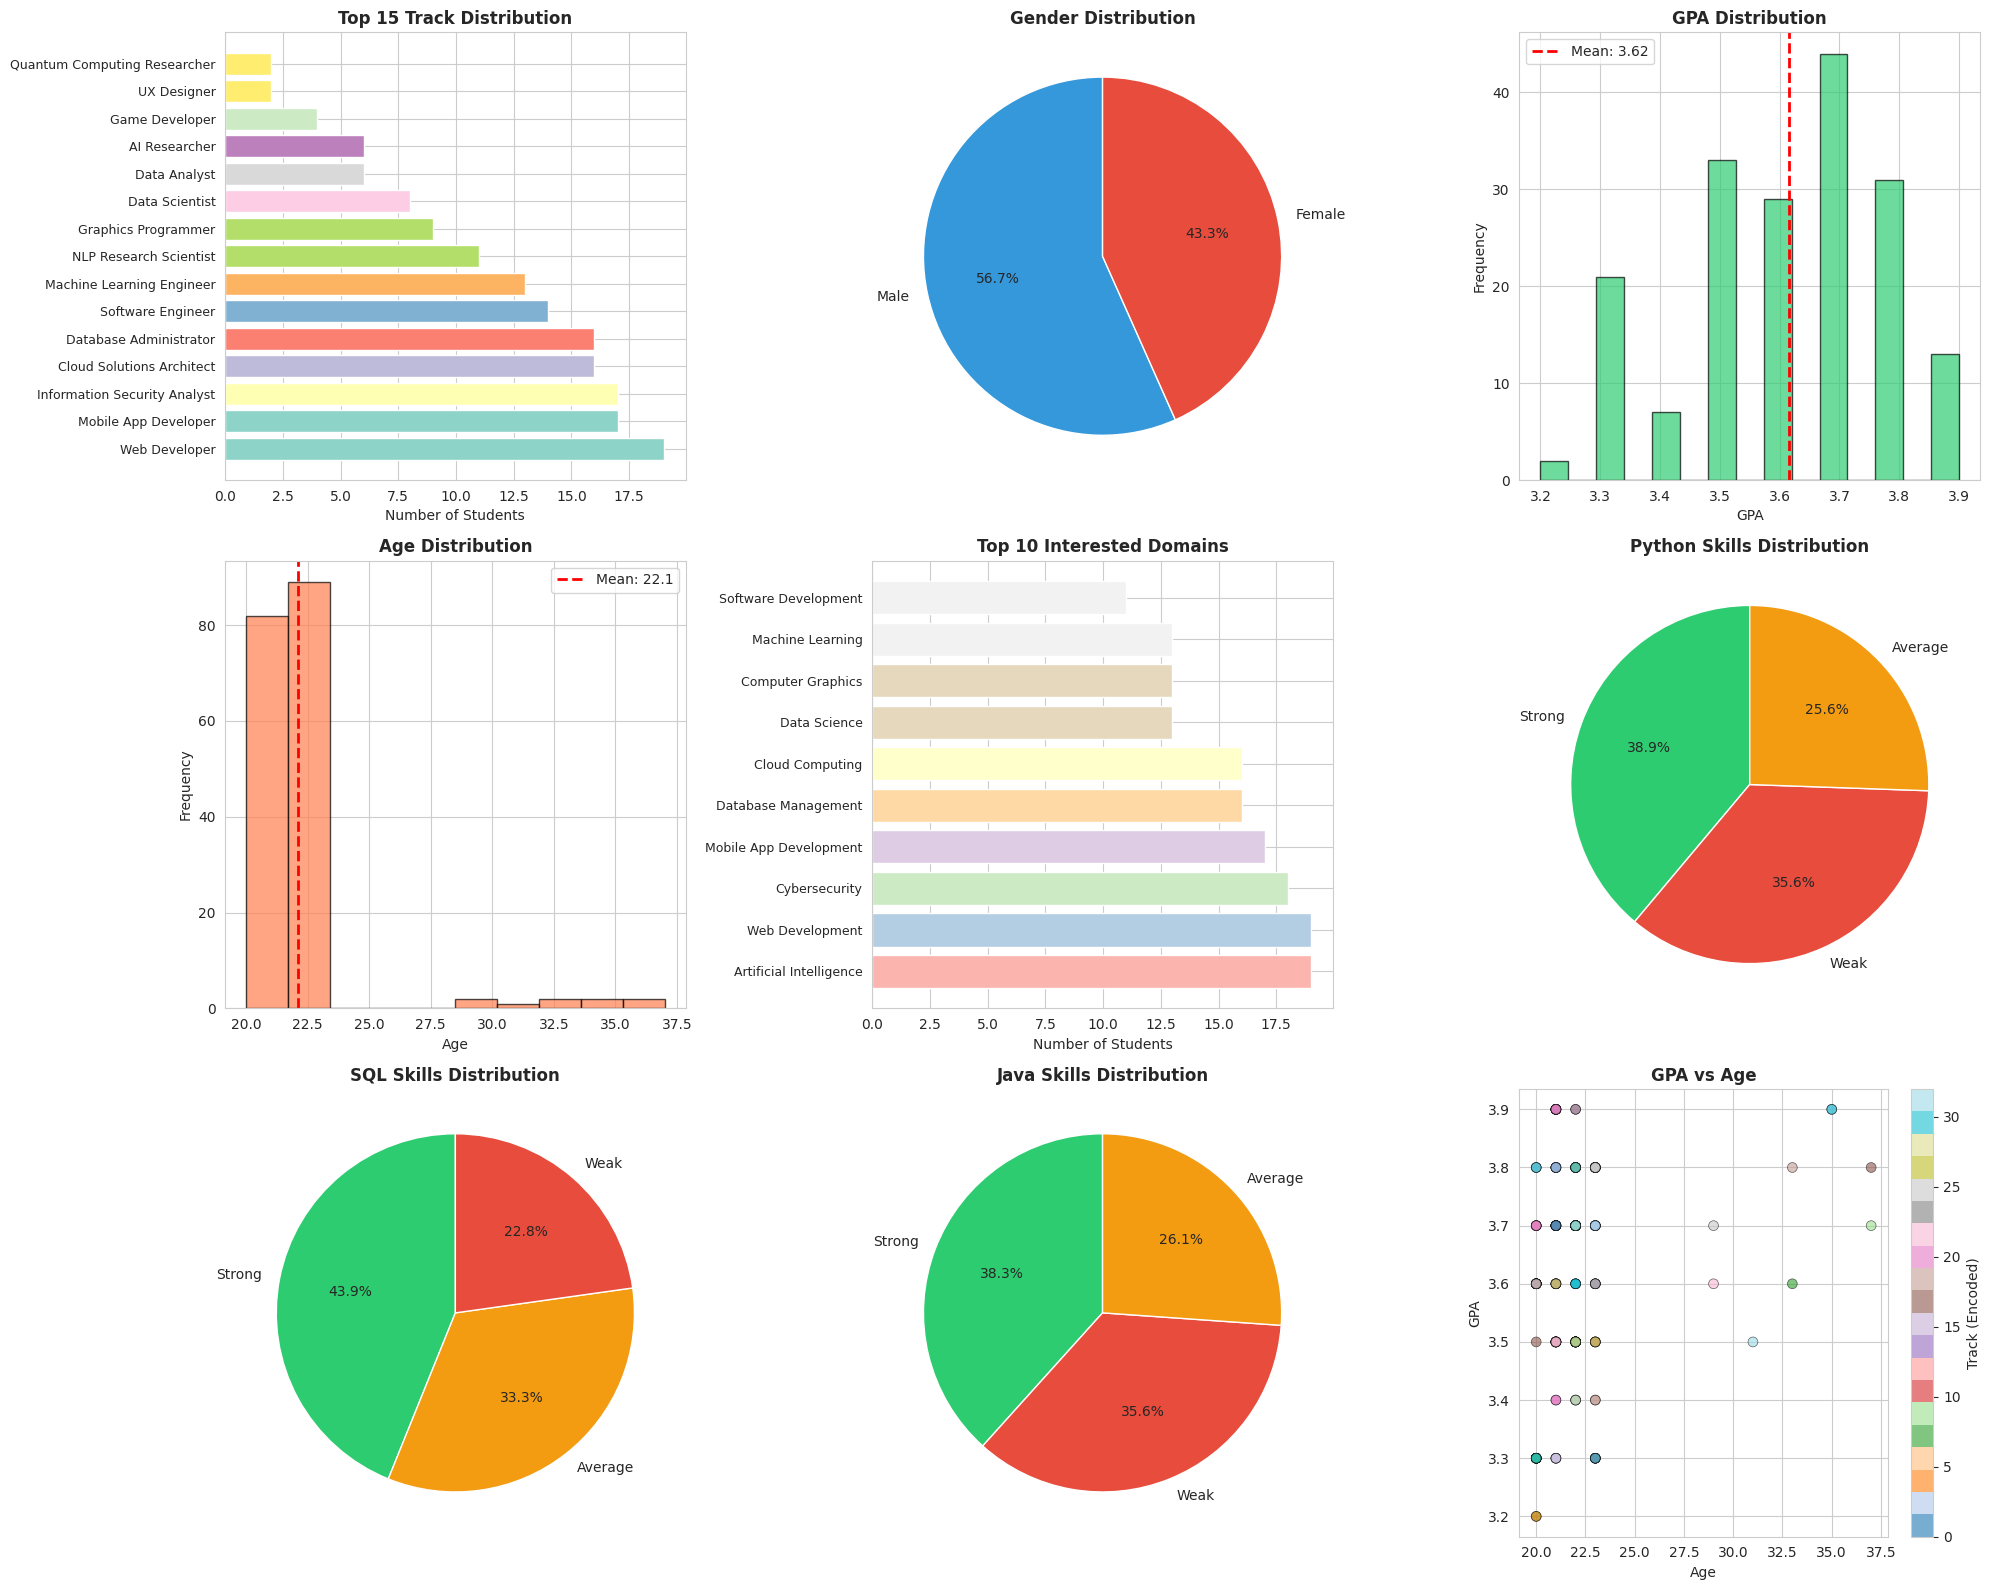

Gender-Track distribution saved to 'gender_track_distribution.png'


<Figure size 1400x600 with 0 Axes>

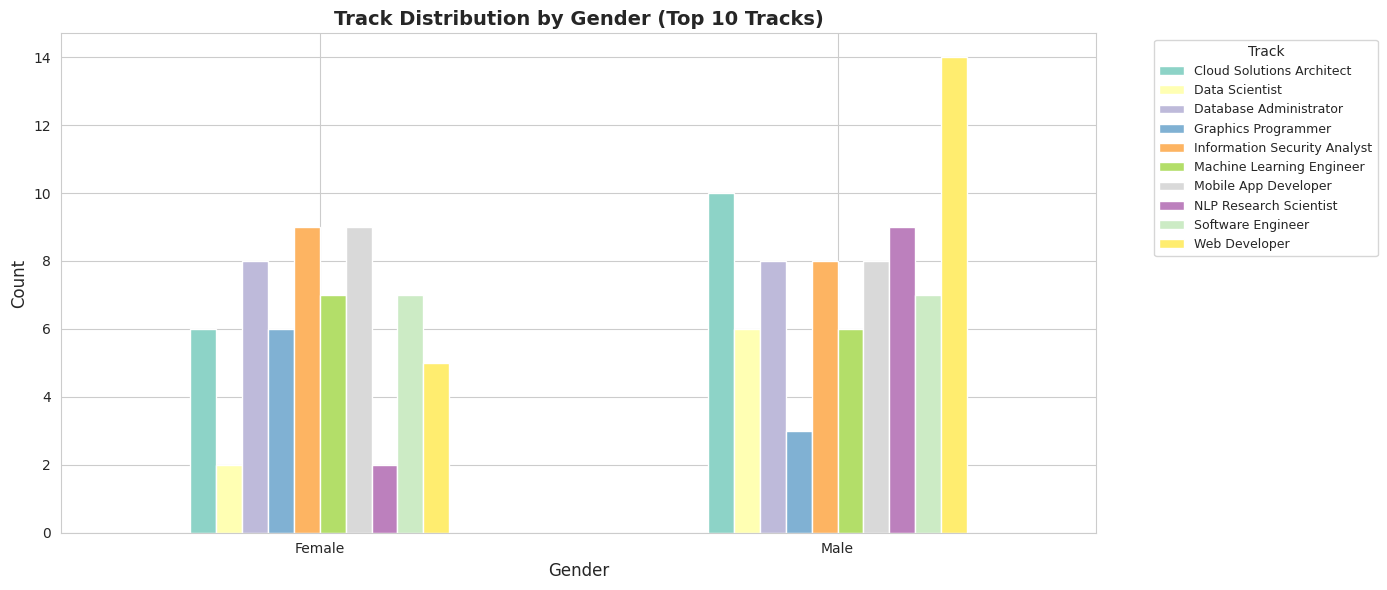

In [25]:
# ================== 4. Data Visualization ==================
print("\n" + "=" * 60)
print("GENERATING VISUALIZATIONS")
print("=" * 60)

# Count number of tracks for dynamic sizing
n_tracks = df["Track"].nunique()
print(f"\nNumber of unique tracks: {n_tracks}")

fig = plt.figure(figsize=(20, 16))

# 1. Track Distribution (Top 15 only for clarity)
plt.subplot(3, 3, 1)
track_counts = df["Track"].value_counts().head(15)
colors_bar = plt.cm.Set3(np.linspace(0, 1, len(track_counts)))
plt.barh(range(len(track_counts)), track_counts.values, color=colors_bar)
plt.yticks(range(len(track_counts)), track_counts.index, fontsize=9)
plt.xlabel("Number of Students", fontsize=10)
plt.title("Top 15 Track Distribution", fontsize=12, fontweight='bold')
plt.tight_layout()
# 2. Gender Distribution
plt.subplot(3, 3, 2)
gender_counts = df["Gender"].value_counts()
colors_gender = ['#3498DB', '#E74C3C']
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors_gender, startangle=90, textprops={'fontsize': 10})
plt.title("Gender Distribution", fontsize=12, fontweight='bold')

# 3. GPA Distribution
plt.subplot(3, 3, 3)
plt.hist(df["GPA"], bins=15, color='#2ECC71', edgecolor='black', alpha=0.7)
plt.xlabel("GPA", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("GPA Distribution", fontsize=12, fontweight='bold')
plt.axvline(df["GPA"].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["GPA"].mean():.2f}')
plt.legend()

# 4. Age Distribution
plt.subplot(3, 3, 4)
plt.hist(df["Age"], bins=10, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Age Distribution", fontsize=12, fontweight='bold')
plt.axvline(df["Age"].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
plt.legend()

# 5. Top Interested Domains
plt.subplot(3, 3, 5)
domain_counts = df["Interested Domain"].value_counts().head(10)
colors_domain = plt.cm.Pastel1(np.linspace(0, 1, len(domain_counts)))
plt.barh(range(len(domain_counts)), domain_counts.values, color=colors_domain)
plt.yticks(range(len(domain_counts)), domain_counts.index, fontsize=9)
plt.xlabel("Number of Students", fontsize=10)
plt.title("Top 10 Interested Domains", fontsize=12, fontweight='bold')

# 6. Python Skills Distribution
plt.subplot(3, 3, 6)
python_counts = df["Python"].value_counts()
colors_skill = {'Strong': '#2ECC71', 'Average': '#F39C12', 'Weak': '#E74C3C'}
colors_python = [colors_skill.get(x, 'gray') for x in python_counts.index]
plt.pie(python_counts.values, labels=python_counts.index, autopct='%1.1f%%',
        colors=colors_python, startangle=90, textprops={'fontsize': 10})
plt.title("Python Skills Distribution", fontsize=12, fontweight='bold')

# 7. SQL Skills Distribution
plt.subplot(3, 3, 7)
sql_counts = df["SQL"].value_counts()
colors_sql = [colors_skill.get(x, 'gray') for x in sql_counts.index]
plt.pie(sql_counts.values, labels=sql_counts.index, autopct='%1.1f%%',
        colors=colors_sql, startangle=90, textprops={'fontsize': 10})
plt.title("SQL Skills Distribution", fontsize=12, fontweight='bold')

# 8. Java Skills Distribution
plt.subplot(3, 3, 8)
java_counts = df["Java"].value_counts()
colors_java = [colors_skill.get(x, 'gray') for x in java_counts.index]
plt.pie(java_counts.values, labels=java_counts.index, autopct='%1.1f%%',
        colors=colors_java, startangle=90, textprops={'fontsize': 10})
plt.title("Java Skills Distribution", fontsize=12, fontweight='bold')

# 9. GPA vs Age
plt.subplot(3, 3, 9)
scatter = plt.scatter(df["Age"], df["GPA"], c=df["Track"].astype('category').cat.codes,
                     cmap='tab20', alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
plt.xlabel("Age", fontsize=10)
plt.ylabel("GPA", fontsize=10)
plt.title("GPA vs Age", fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Track (Encoded)')

plt.tight_layout()
plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved to 'data_visualization.png'")
plt.show()

# Additional visualization: Track distribution by Gender (Top tracks only)
if n_tracks > 10:
    top_tracks = df["Track"].value_counts().head(10).index
    df_top = df[df["Track"].isin(top_tracks)]

    plt.figure(figsize=(14, 6))
    gender_track = pd.crosstab(df_top["Gender"], df_top["Track"])
    gender_track.plot(kind='bar', figsize=(14, 6), colormap='Set3')
    plt.title("Track Distribution by Gender (Top 10 Tracks)", fontsize=14, fontweight='bold')
    plt.xlabel("Gender", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Track", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('gender_track_distribution.png', dpi=300, bbox_inches='tight')
    print("Gender-Track distribution saved to 'gender_track_distribution.png'")
    plt.show()


In [26]:
# ================== 5. Encode Categorical Features ==================
print("\n" + "=" * 60)
print("ENCODING CATEGORICAL FEATURES")
print("=" * 60)

from sklearn.preprocessing import LabelEncoder

# Save original track names for later
track_encoder = LabelEncoder()
df["Track_Original"] = df["Track"]
df["Track"] = track_encoder.fit_transform(df["Track"])

# Print track mapping
print("\nTrack Encoding Mapping:")
for i, track_name in enumerate(track_encoder.classes_):
    print(f"  {i}: {track_name}")

# Encode other categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    if column != "Track_Original":
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
        print(f"\nEncoded: {column}")

# Drop the original track column
df.drop(columns=["Track_Original"], inplace=True)


ENCODING CATEGORICAL FEATURES

Track Encoding Mapping:
  0: AI Researcher
  1: Bioinformatician
  2: Blockchain Engineer
  3: Cloud Solutions Architect
  4: Computer Vision Engineer
  5: Data Analyst
  6: Data Privacy Specialist
  7: Data Scientist
  8: Database Administrator
  9: DevOps Engineer
  10: Digital Forensics Specialist
  11: Distributed Systems Engineer
  12: Embedded Software Engineer
  13: Ethical Hacker
  14: Game Developer
  15: Geospatial Analyst
  16: Graphics Programmer
  17: Healthcare IT Specialist
  18: Information Security Analyst
  19: IoT Developer
  20: Machine Learning Engineer
  21: Machine Learning Researcher
  22: Mobile App Developer
  23: NLP Engineer
  24: NLP Research Scientist
  25: Quantum Computing Researcher
  26: Robotics Engineer
  27: SEO Specialist
  28: Security Analyst
  29: Software Engineer
  30: UX Designer
  31: VR Developer
  32: Web Developer

Encoded: Gender

Encoded: Major

Encoded: Interested Domain

Encoded: Projects

Encoded: Pyth


CORRELATION ANALYSIS

✓ Correlation heatmap saved to 'correlation_heatmap.png'


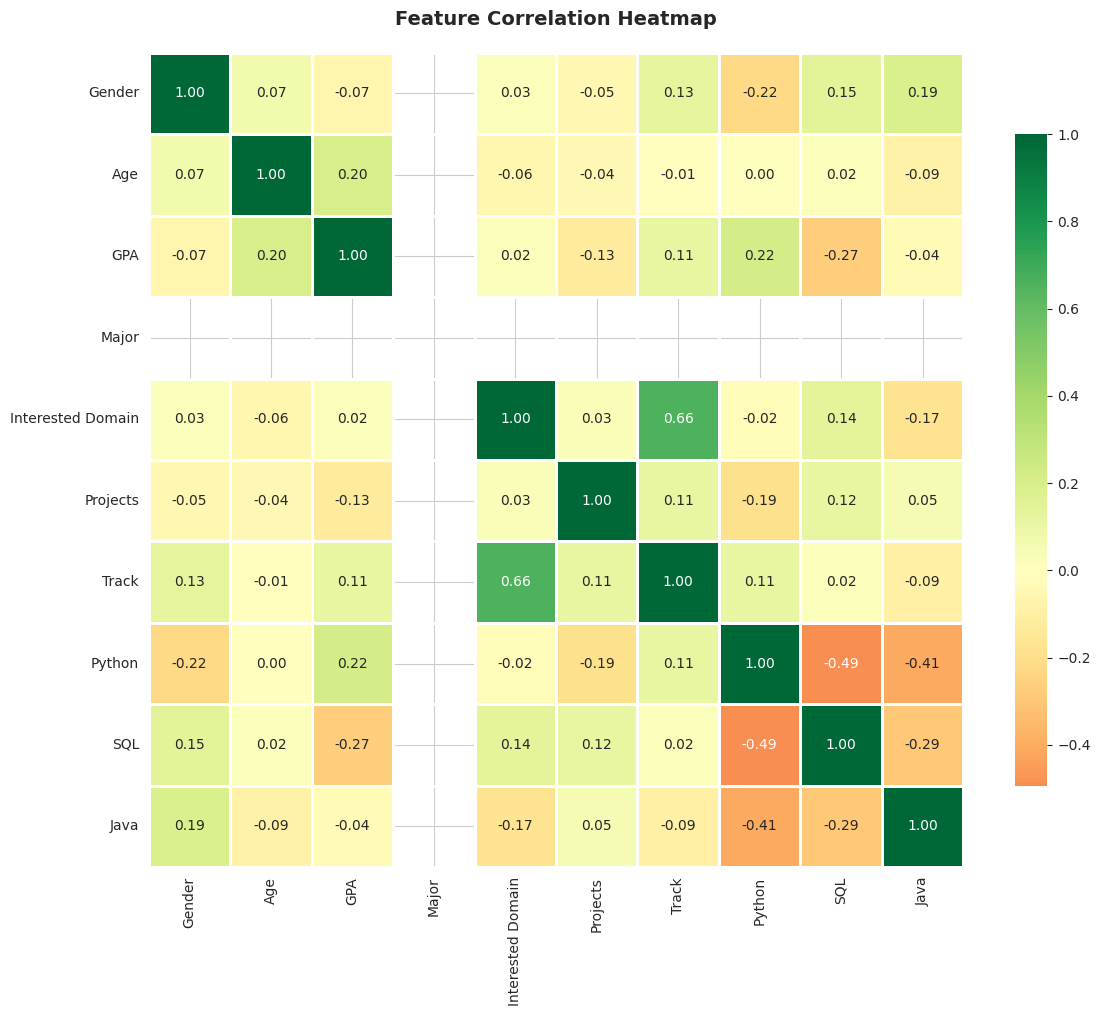


Strongest Correlations with Track:
Interested Domain    0.660963
Gender               0.125027
Projects             0.114968
GPA                  0.111679
Python               0.110964
SQL                  0.023116
Age                 -0.006941
Java                -0.094798
Major                     NaN
Name: Track, dtype: float64


In [27]:
# ================== 6. Correlation Analysis ==================
print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("\n✓ Correlation heatmap saved to 'correlation_heatmap.png'")
plt.show()

# Find strongest correlations with Track
track_correlations = correlation_matrix["Track"].drop("Track").sort_values(ascending=False)
print("\nStrongest Correlations with Track:")
print(track_correlations)

In [28]:
# ================== 7. Prepare Data for Training ==================
print("\n" + "=" * 60)
print("PREPARING DATA FOR TRAINING")
print("=" * 60)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Track", axis=1)
y = df["Track"]

print(f"\nFeatures (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Check class distribution
print("\nClass distribution:")
class_counts = y.value_counts()
print(class_counts)

# Check if we can use stratify
# Had an issue where some tracks only had 1 student
# This breaks stratify, so checking the minimum count first
min_class_count = class_counts.min()
use_stratify = min_class_count >= 2

if not use_stratify:
    print(f"\nWarning: Some classes have only {min_class_count} sample(s).")
    print("   Stratification will be disabled for this split.")
    print("   Consider collecting more data for better model performance.")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y if use_stratify else None
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Check train/test distribution
print("\nTraining set class distribution:")
print(y_train.value_counts().sort_index())
print("\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler")


PREPARING DATA FOR TRAINING

Features (X): (180, 9)
Target (y): (180,)

Class distribution:
Track
32    19
22    17
18    17
3     16
8     16
29    14
20    13
24    11
16     9
7      8
5      6
0      6
14     4
30     2
25     2
1      2
17     2
21     1
26     1
12     1
28     1
13     1
19     1
4      1
9      1
23     1
31     1
27     1
2      1
6      1
15     1
11     1
10     1
Name: count, dtype: int64

   Stratification will be disabled for this split.
   Consider collecting more data for better model performance.

Training set: 144 samples
Testing set: 36 samples

Training set class distribution:
Track
0      5
1      1
2      1
3     11
4      1
5      5
6      1
7      7
8     14
9      1
10     1
12     1
14     3
15     1
16     8
17     1
18    15
20    11
21     1
22     7
23     1
24    11
25     2
26     1
27     1
28     1
29    14
30     2
31     1
32    14
Name: count, dtype: int64

Test set class distribution:
Track
0      1
1      1
3      5
5      1
7   

In [29]:
# ================== 8. Train Multiple Models ==================
"""
 Note: Initially tried only Random Forest but accuracy was not what i want
 Added more models for comparison and found SVM performed better
 Also tried Deep Learning but was overkill for this dataset
"""
# from tensorflow import keras
# model = keras.Sequential([...])  # Tried this but too complex
print("\n" + "=" * 60)
print("TRAINING AND EVALUATING MODELS")
print("=" * 60)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to test
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=True,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        random_state=42
    )
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\n{'=' * 50}")
    print(f"Training: {name}")
    print('=' * 50)

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"\nClassification Report:")

    # Get unique classes in test set
    unique_classes = np.unique(np.concatenate([y_test, y_pred]))
    target_names_filtered = [track_encoder.classes_[i] for i in unique_classes]

    print(classification_report(
        y_test,
        y_pred,
        labels=unique_classes,
        target_names=target_names_filtered,
        zero_division=0
    ))



TRAINING AND EVALUATING MODELS

Training: Random Forest

Accuracy: 0.8333 (83.33%)

Classification Report:
                              precision    recall  f1-score   support

               AI Researcher       1.00      1.00      1.00         1
            Bioinformatician       1.00      1.00      1.00         1
   Cloud Solutions Architect       1.00      1.00      1.00         5
                Data Analyst       0.33      1.00      0.50         1
              Data Scientist       1.00      1.00      1.00         1
      Database Administrator       0.67      1.00      0.80         2
Distributed Systems Engineer       0.00      0.00      0.00         1
              Ethical Hacker       0.00      0.00      0.00         1
              Game Developer       1.00      1.00      1.00         1
         Graphics Programmer       0.33      1.00      0.50         1
    Healthcare IT Specialist       0.00      0.00      0.00         1
Information Security Analyst       0.67      1.00  


MODEL COMPARISON

Model Performance Ranking:
1. Gradient Boosting         - Accuracy: 0.9167 (91.67%)
2. Random Forest             - Accuracy: 0.8333 (83.33%)
3. SVM                       - Accuracy: 0.6667 (66.67%)
4. Logistic Regression       - Accuracy: 0.5833 (58.33%)
5. K-Nearest Neighbors       - Accuracy: 0.5556 (55.56%)

Model comparison saved to 'model_comparison.png'


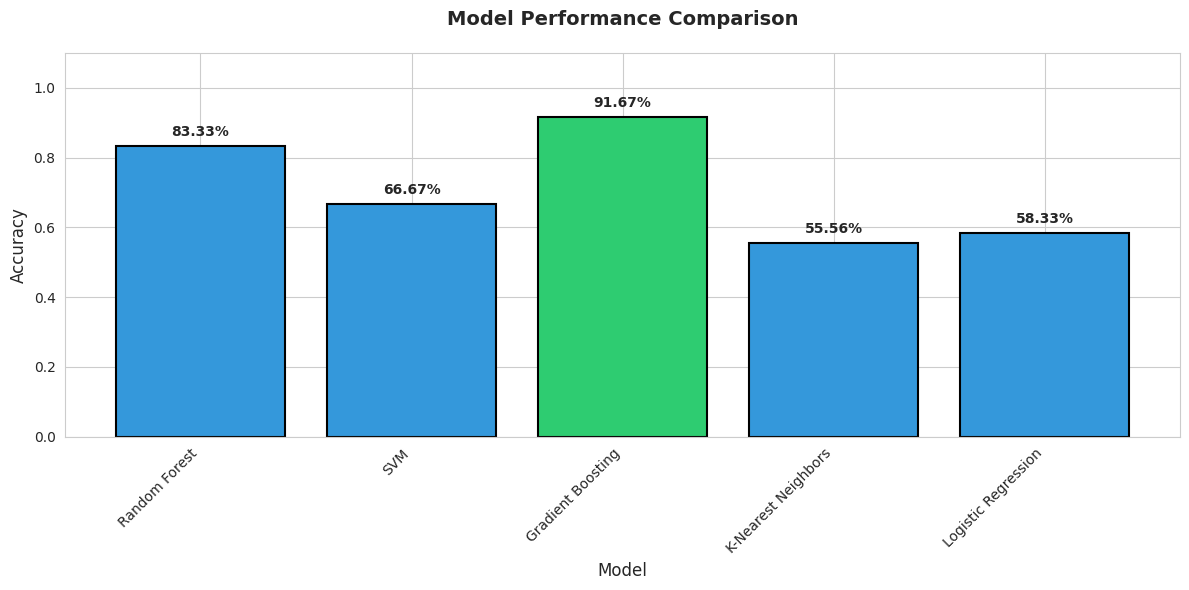

In [30]:
# ================== 9. Compare Models ==================
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

# Sort results
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\nModel Performance Ranking:")
for i, (name, acc) in enumerate(sorted_results, 1):
    print(f"{i}. {name:25s} - Accuracy: {acc:.4f} ({acc*100:.2f}%)")

# Visualize comparison
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = ['#2ECC71' if acc == max(accuracies) else '#3498DB' for acc in accuracies]

bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black', linewidth=1.5)
plt.title("Model Performance Comparison", fontsize=14, fontweight='bold', pad=20)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim([0, 1.1])
plt.xticks(rotation=45, ha='right')

# Add accuracy labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{acc*100:.2f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\nModel comparison saved to 'model_comparison.png'")
plt.show()

In [31]:
# ================== 10. Save Best Model ==================
print("\n" + "=" * 60)
print("SAVING BEST MODEL")
print("=" * 60)

import pickle

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_accuracy = results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Save model, scaler, and encoder
with open("track_recommendation_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("track_encoder.pkl", "wb") as f:
    pickle.dump(track_encoder, f)

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("\nModel saved to 'track_recommendation_model.pkl'")
print("Scaler saved to 'scaler.pkl'")
print("Track encoder saved to 'track_encoder.pkl'")
print("Label encoders saved to 'label_encoders.pkl'")


SAVING BEST MODEL

Best Model: Gradient Boosting
Accuracy: 0.9167 (91.67%)

Model saved to 'track_recommendation_model.pkl'
Scaler saved to 'scaler.pkl'
Track encoder saved to 'track_encoder.pkl'
Label encoders saved to 'label_encoders.pkl'


In [32]:
# ================== 11. Test Predictions ==================
print("\n" + "=" * 60)
print("SAMPLE PREDICTIONS")
print("=" * 60)

# Show some predictions
sample_indices = np.random.choice(len(X_test), min(5, len(X_test)), replace=False)
sample_predictions = best_model.predict(X_test_scaled[sample_indices])
sample_actuals = y_test.iloc[sample_indices].values

print("\nSample Predictions vs Actual:")
print("-" * 60)
for i, (pred, actual) in enumerate(zip(sample_predictions, sample_actuals), 1):
    pred_label = track_encoder.inverse_transform([pred])[0]
    actual_label = track_encoder.inverse_transform([actual])[0]
    match = "✓" if pred == actual else "✗"
    print(f"{i}. Predicted: {pred_label:30s} | Actual: {actual_label:30s} {match}")

print("\n" + "=" * 60)
print("MODEL TRAINING COMPLETE!")
print("=" * 60)


SAMPLE PREDICTIONS

Sample Predictions vs Actual:
------------------------------------------------------------
1. Predicted: Information Security Analyst   | Actual: Information Security Analyst   ✓
2. Predicted: Mobile App Developer           | Actual: Mobile App Developer           ✓
3. Predicted: Information Security Analyst   | Actual: Ethical Hacker                 ✗
4. Predicted: Cloud Solutions Architect      | Actual: Cloud Solutions Architect      ✓
5. Predicted: Machine Learning Engineer      | Actual: Machine Learning Engineer      ✓

MODEL TRAINING COMPLETE!


**Future Improvements**

"""

TODO: Try SMOTE for handling imbalanced classes

TODO: Add feature importance visualization

TODO: Create a simple Flask API for the model

TODO: Collect more data for rare tracks

"""